In [6]:
import numpy as np
from scipy.linalg import expm, polar, qr
import matplotlib.pyplot as plt 

In [7]:
X = np.array([[0, 1], [1, 0]], dtype=np.complex128)
Y = np.array([[0, -1j], [1j, 0]], dtype=np.complex128)
Z = np.array([[1, 0], [0, -1]], dtype=np.complex128)
Id = np.eye(2, dtype=np.complex128)

In [8]:
def update_propagator(
    U_accumulated, hamiltonian, time_delta, polar_project=False, qr_project=False
):

    # Ensure the Hamiltonian is Hermitian
    assert np.allclose(
        hamiltonian, hamiltonian.conj().T
    ), "Hamiltonian must be Hermitian."

    # Compute the step propagator
    U_step = expm(-1j * hamiltonian * time_delta)

    # Update the accumulated propagator
    U_accumulated = U_accumulated @ U_step

    # Ensure unitarity by projection if required
    if polar_project and qr_project:
        raise ValueError("Only one of polar_project or qr_project can be True.")
    elif polar_project:
        try:
            U_accumulated, _ = polar(U_accumulated)
        except Exception as e:
            raise RuntimeError(f"Polar decomposition failed: {e}")
    elif qr_project:
        try:
            U_accumulated, _ = qr(U_accumulated)
        except Exception as e:
            raise RuntimeError(f"QR decomposition failed: {e}")

    # Ensure the accumulated propagator is unitary
    assert np.allclose(
        U_accumulated @ U_accumulated.conj().T,
        np.eye(U_accumulated.shape[0], dtype=np.complex128),
    ), "The accumulated propagator is not unitary."

    return U_accumulated

In [9]:
def gate_fidelity(final_unitary, target_unitary):
    dim = final_unitary.shape[0]  # Dimension of the unitary matrix
    overlap = np.trace(target_unitary.conj().T @ final_unitary)
    fidelity_gate = np.abs(overlap / dim) ** 2
    return fidelity_gate

In [10]:
N = 30
time_delta = np.linspace(0.1, 0.5, 50)

In [11]:
omega1, delta1 = -4, -4
driving, detuning = omega1 * X, delta1 * Z
hamiltonian = 0.5 * (driving + detuning)
# hadamard gate
H_target = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]], dtype=np.complex128)

In [12]:
fidelities = []
U_accumulated = np.eye(hamiltonian.shape[0], dtype=np.complex128)
for time in time_delta:
    for _ in range(1, N+1, 1):
        U_accumulated = update_propagator(U_accumulated, hamiltonian, time)
        fidelities.append(gate_fidelity(U_accumulated, H_target))

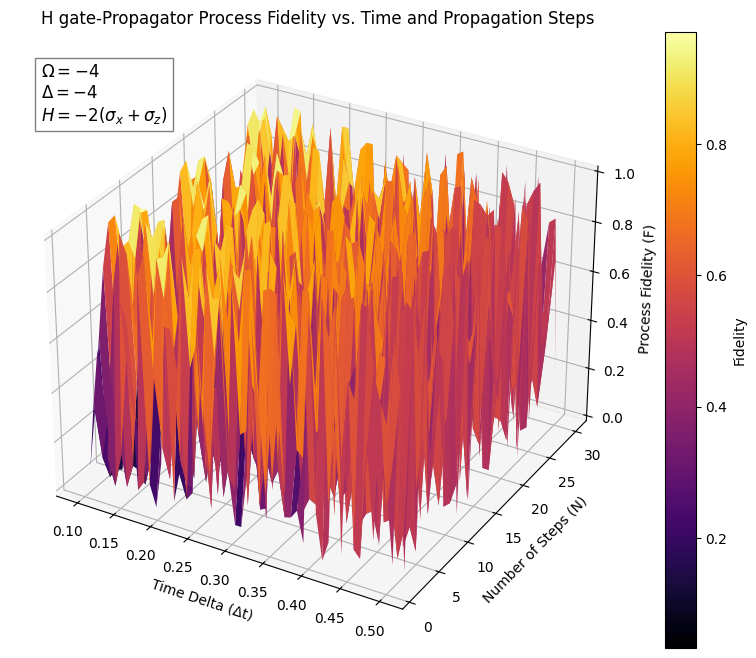

In [13]:
fidelity_array = np.array(fidelities).reshape(len(time_delta), N)

# Create a meshgrid for plotting:
# - X-axis: time points (time_delta)
# - Y-axis: step index (from 1 to N)
T, Steps = np.meshgrid(time_delta, np.arange(1, N + 1), indexing="ij")

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the surface where the z-axis represents the fidelity values
surf = ax.plot_surface(T, Steps, fidelity_array, cmap="inferno", edgecolor="none")

ax.set_xlabel("Time Delta (Δt)")
ax.set_ylabel("Number of Steps (N)")
ax.set_zlabel("Process Fidelity (F)")

fig.colorbar(surf, ax=ax, label="Fidelity",)
# Add text annotation to the plot
textstr = (
    r"$\Omega = -4$"
    + "\n"
    + r"$\Delta = -4$"
    + "\n"
    + r"$H = -2(\sigma_x + \sigma_z)$"
)
ax.text2D(
    0.05,
    0.95,
    textstr,
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment="top",
    bbox=dict(facecolor="white", alpha=0.5),
)
plt.title("H gate-Propagator Process Fidelity vs. Time and Propagation Steps")
plt.show()

In [12]:
N = 30
fidelities = []
U_accumulated = np.eye(hamiltonian.shape[0], dtype=np.complex128)
for _ in range(1, N + 1, 1):
    U_accumulated = update_propagator(U_accumulated, hamiltonian, 1/9)
    fidelities.append(gate_fidelity(U_accumulated, H_target))

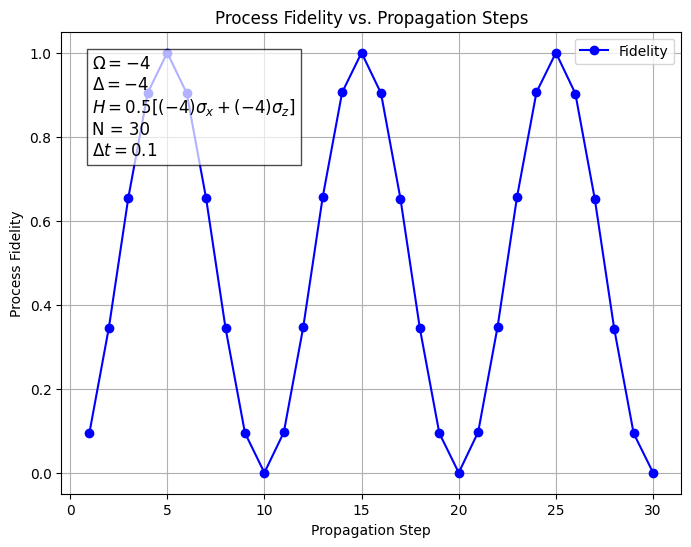

In [13]:
# Create an array for propagation steps
steps = np.arange(1, N + 1)

# Create the plot with enhancements
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(steps, fidelities, marker="o", linestyle="-", color="blue", label="Fidelity")
ax.set_xlabel("Propagation Step")
ax.set_ylabel("Process Fidelity")
ax.set_title("Process Fidelity vs. Propagation Steps")
ax.grid(True)
ax.legend()

# Add annotation text to the plot
textstr = (
    r"$\Omega = -4$"
    + "\n"
    + r"$\Delta = -4$"
    + "\n"
    + r"$H = 0.5[(-4)\sigma_x + (-4)\sigma_z]$"
    + "\n"
    + r"N = 30"
    + "\n"
    + r"$\Delta t = 0.1$"
)
ax.text(
    0.05,
    0.95,
    textstr,
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment="top",
    bbox=dict(facecolor="white", alpha=0.7),
)

plt.show()

In [14]:
omega1, delta1 = 0, 4
driving, detuning = omega1 * X, delta1 * Z
hamiltonian = 0.5 * (driving + detuning)
# T gate
T_target = np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]], dtype=np.complex128)

In [15]:
fidelities = []
U_accumulated = np.eye(hamiltonian.shape[0], dtype=np.complex128)
for time in time_delta:
    for _ in range(1, N + 1, 1):
        U_accumulated = update_propagator(U_accumulated, hamiltonian, time)
        fidelities.append(gate_fidelity(U_accumulated, T_target))

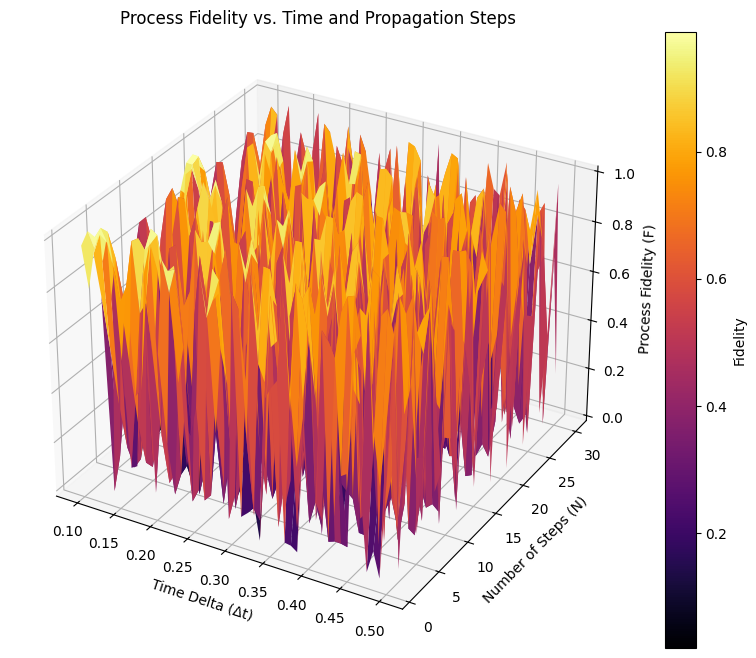

In [16]:
fidelity_array = np.array(fidelities).reshape(len(time_delta), N)

# Create a meshgrid for plotting:
# - X-axis: time points (time_delta)
# - Y-axis: step index (from 1 to N)
T, Steps = np.meshgrid(time_delta, np.arange(1, N + 1), indexing="ij")

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the surface where the z-axis represents the fidelity values
surf = ax.plot_surface(T, Steps, fidelity_array, cmap="inferno", edgecolor="none")

ax.set_xlabel("Time Delta (Δt)")
ax.set_ylabel("Number of Steps (N)")
ax.set_zlabel("Process Fidelity (F)")

fig.colorbar(
    surf,
    ax=ax,
    label="Fidelity",
)
plt.title("Process Fidelity vs. Time and Propagation Steps")
plt.show()

In [ ]:
N = 30
fidelities = []
U_accumulated = np.eye(hamiltonian.shape[0], dtype=np.complex128)
for _ in range(1, N + 1, 1):
    U_accumulated = update_propagator(U_accumulated, hamiltonian, 1 / 10)
    fidelities.append(gate_fidelity(U_accumulated, T_target))

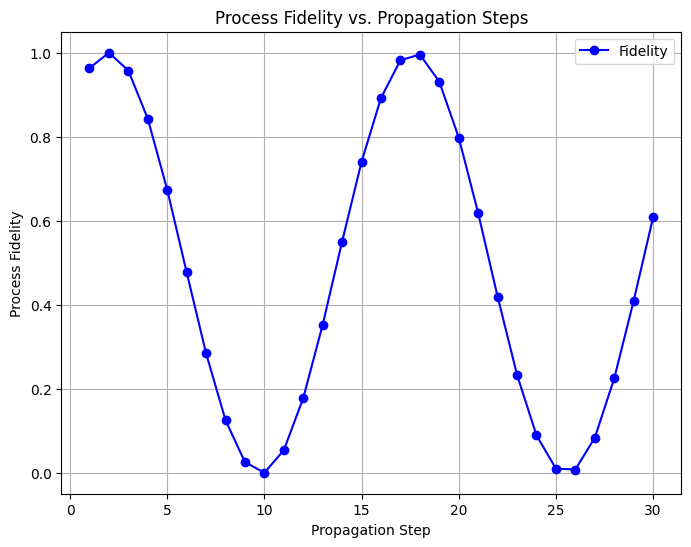

In [19]:
# Create an array for propagation steps
steps = np.arange(1, N + 1)

# Create the plot with enhancements
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(steps, fidelities, marker="o", linestyle="-", color="blue", label="Fidelity")
ax.set_xlabel("Propagation Step")
ax.set_ylabel("Process Fidelity")
ax.set_title("Process Fidelity vs. Propagation Steps")
ax.grid(True)
ax.legend()

# Add annotation text to the plot
# textstr = (
#     r"$\Omega = -1$"
#     + "\n"
#     + r"$\Delta = -1$"
#     + "\n"
#     + r"$H = -0.5(\sigma_x + \sigma_z)$"
#     + "\n"
#     + r"N = 20"
#     + "\n"
#     + r"$\Delta t = 0.1$"
# )
# ax.text(
#     0.05,
#     0.95,
#     textstr,
#     transform=ax.transAxes,
#     fontsize=12,
#     verticalalignment="top",
#     bbox=dict(facecolor="white", alpha=0.7),
# )

plt.show()

In [20]:
#two qubit hamltinoian

omega1, omega2, delta1, delta2, coupling_strength_zx = 0, -4, -4, 0, 4
H_driving_control = omega1 * np.kron(X, Id)
# Detuning term for control qubit
H_detuning_control = delta1 * np.kron(Z, Id)
# Target qubit Hamiltonian (control field + detuning)
H_driving_target = omega2 * np.kron(Id, X)
# Detuning term for target qubit
H_detuning_target = delta2 * np.kron(Id, Z)
# Interaction Hamiltonian
H_interaction_driving = coupling_strength_zx * np.kron(Z, X)
# H_interaction_detuning = coupling_strength_zz * np.kron(self.Z, self.Z)
hamiltonian = 0.5 * (H_driving_control + H_detuning_control + H_driving_target + H_detuning_target + H_interaction_driving)
# CNOT gate
CNOT_target = np.array(
    [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]], dtype=np.complex128
)

In [21]:
fidelities = []
U_accumulated = np.eye(hamiltonian.shape[0], dtype=np.complex128)
for time in time_delta:
    for _ in range(1, N + 1, 1):
        U_accumulated = update_propagator(U_accumulated, hamiltonian, time)
        fidelities.append(gate_fidelity(U_accumulated, CNOT_target))

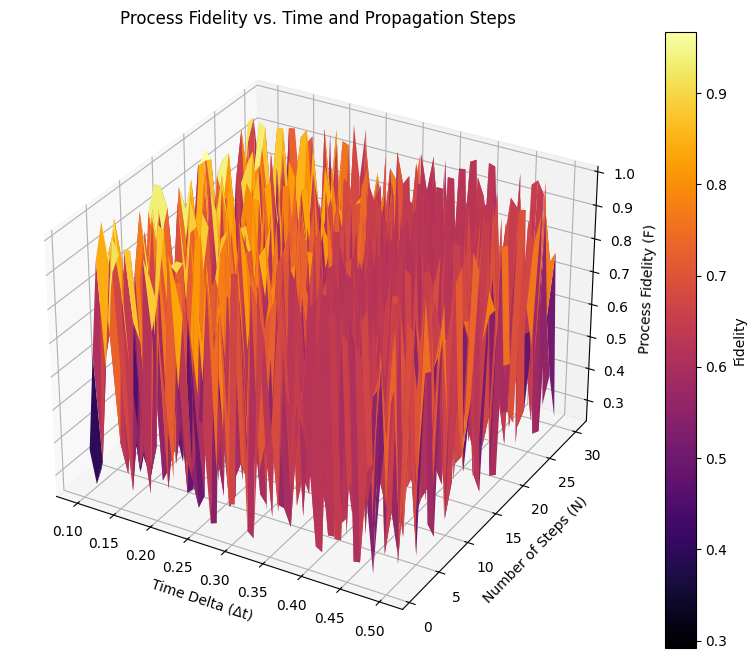

In [22]:
fidelity_array = np.array(fidelities).reshape(len(time_delta), N)

# Create a meshgrid for plotting:
# - X-axis: time points (time_delta)
# - Y-axis: step index (from 1 to N)
T, Steps = np.meshgrid(time_delta, np.arange(1, N + 1), indexing="ij")

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the surface where the z-axis represents the fidelity values
surf = ax.plot_surface(T, Steps, fidelity_array, cmap="inferno", edgecolor="none")

ax.set_xlabel("Time Delta (Δt)")
ax.set_ylabel("Number of Steps (N)")
ax.set_zlabel("Process Fidelity (F)")

fig.colorbar(
    surf,
    ax=ax,
    label="Fidelity",
)
plt.title("Process Fidelity vs. Time and Propagation Steps")
plt.show()

In [28]:
N = 30
fidelities = []
U_accumulated = np.eye(hamiltonian.shape[0], dtype=np.complex128)
for _ in range(1, N + 1, 1):
    U_accumulated = update_propagator(U_accumulated, hamiltonian, 1/5)
    fidelities.append(gate_fidelity(U_accumulated, CNOT_target))

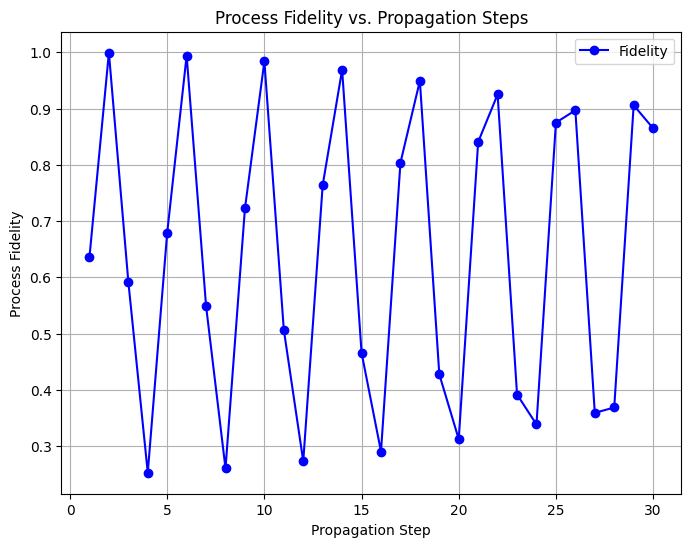

In [29]:
# Create an array for propagation steps
steps = np.arange(1, N + 1)

# Create the plot with enhancements
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(steps, fidelities, marker="o", linestyle="-", color="blue", label="Fidelity")
ax.set_xlabel("Propagation Step")
ax.set_ylabel("Process Fidelity")
ax.set_title("Process Fidelity vs. Propagation Steps")
ax.grid(True)
ax.legend()

# Add annotation text to the plot
# textstr = (
#     r"$\Omega = -1$"
#     + "\n"
#     + r"$\Delta = -1$"
#     + "\n"
#     + r"$H = -0.5(\sigma_x + \sigma_z)$"
#     + "\n"
#     + r"N = 20"
#     + "\n"
#     + r"$\Delta t = 0.1$"
# )
# ax.text(
#     0.05,
#     0.95,
#     textstr,
#     transform=ax.transAxes,
#     fontsize=12,
#     verticalalignment="top",
#     bbox=dict(facecolor="white", alpha=0.7),
# )

plt.show()